In [26]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', None)


import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [27]:
df2 = pd.read_excel(r"FinalDF.xlsx")
df2.head()

,Unnamed: 0,Date,Summary,Negative,Positive,Neutral,Comp,Open,High,Low,Close,Adj Close,Volume
0,0,2021-01-11,"Few companies drive stock market across the world. In India, Reliance &amp; TCS accounted for a 1/3rd increase in India’s market cap in last 3 years. In MSCI world index, 2% of the companies accounted for a 25 percent gain in last 5 years. In 2020, 82% of Nifty gain came from 5 cos.,Reliance trading at 30 PE and 2.60 PB , isn't it cheap stock by valuation at this point time when some large cap trading very high PE and PB?\n\n _bhasin,$MDR McDermott - McDermott Completes Reliance's KG-D6 R Cluster Project\nFrom our Stock News Alerts App,RELIANCE Future \nSuppose BREAKS /Closes below 1850 for 3 days ???\n\nStock will CRASH to kiss Rs 1600 soon,Investment\n\nNetwork18 CMP 37 good consolidation happening. In coming year we may see Network18 crossing 50+ &amp; 70-80 range. Good profitable business should do well from here\n\nNifty nifty50 StocksToWatch stockstobuy StockMarket stocksinnews reliance WC7 stock banknifty",0.021,0.177,0.802,0.9739,1938.800049,1938.800049,1892.500000,1897.250000,1891.166260,15371556
1,1,2021-01-12,"Reliance Industries (RIL) is a good stock?,The biggest bust in equity markets globally is around the corner. Sit on cash, withdraw your hard earned money from inflated stock prices. Remember the rules of greed. Miss the bus of short term profits even if it is for a few months. Do not get stuck nifty Reliance Adani,RIL moves at last\n\nAfter a rather dull beginning to 2021, shares of Reliance Industries came back to life with a sharp 3 per cent jump today. The stock was the biggest contributor to Nifty50’s gains.,Are you kidding me? I was there at 12, and Amazon, flipkart, reliance tells me it's out of stock?? PlayStation5,Short Term Stock Option Buy RELIANCE JAN CE 1940.00 @69-71 SL 42 TGT 118,reliance stock *above 1960 can touch 2000-2020 with in 3-4 trading days then view negate below 1920 . cmp 1947,TCS stock reaching historic high of 3196. Its market cap going above Rs.11lakh cr (USD 150Bn), 1 lakh Cr below reliance industry BSE TCS,What a shit show. Amazon, Flipkart don't even have the ps5 listed. Reliance Digital went out of the stock the moment i entered payment details and Croma is just not adding to cart, Shop at SC is stuck at please wait after adding to cart. ps5india _india .,PS5 sold out in a matter of seconds. Amazon, Flipkart, Reliance Digital, Vijay sales no where in stock barely 2 mins after 12PM. What poor handling of a console launch from _india ,PS5 out of Stock In Just 7 minutes \nKudos to Amazon and Flipcart. \nFor those who were not able to get it, go check out Reliance Digital Store they are still available. \nPS5 ps5india Amazon ps5restock Sony India Flipcart \n ,ps5india Are you fucckiinnggg kidding me? :O I was there at 12, with 300 Mbps connection, and Amazon, flipkart, reliance tells me it's out of stock? Was the stock even there? PlayStation5,PS5 india stock svl in prepaidgamercard and reliance digital still\nPlease try to get,reliance digital still has the stock,👉We Provide Very High Margin in Mcx ~ Equity stock future &amp; options ~ Ncdex &amp; Currencies Exposure per lot as per below in our broking :---- \n\nEQ Stock Future Margin👇 :---\n\n[ Nifty ~ 4000] [ Banknifty ~ 3000] [ Reliance ~ 4000] [ Hdf... frontpage_a",0.056,0.101,0.843,0.8820,1903.000000,1960.000000,1899.900024,1957.050049,1950.774536,18996047
2,2,2021-01-13,"HDFC Bank has replaced Reliance Industries to become the highest weighted stock in Nifty\n\nRIL’s weightage slipped to a low of 9.82% while that of HDFC Bank has gone up to 10.15%. \n\nInfosys holds the third position with a weightage of 8.61% on the index.,*Nifty reduces RIL's weightage:*\n\nHDFC Bank has replaced Reliance Industries to become the highest weighted stock on the bourses.\n\nRIL’s weightage on Nifty50 slipped to a low of 9.82% while that of HDFC Bank has gone up to 10.15%. In its prime, RIL's weightage was as high as 15%.",0.045,0.029,0

In [28]:
X = df2[['Date','Adj Close','Negative','Neutral','Positive','Comp']]
X.head()

,Date,Adj Close,Negative,Neutral,Positive,Comp
0,2021-01-11,1891.166260,0.021,0.802,0.177,0.9739
1,2021-01-12,1950.774536,0.056,0.843,0.101,0.8820
2,2021-01-13,1932.583130,0.045,0.927,0.029,-0.1280
3,2021-01-14,1954.313110,0.054,0.908,0.038,-0.1873
4,2021-01-15,1931.237305,0.033,0.813,0.155,0.8957


In [29]:
#Univariate & Bivariate Analysis before Model creation

#Plotting different components over time 
X[['Volume']].plot()
plt.title("Volume of Trades over time")
plt.show()

KeyError: "None of [Index(['Volume'], dtype='object')] are in the [columns]"

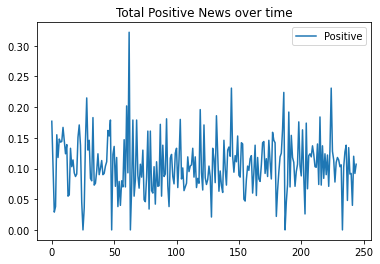

In [30]:
X[['Positive']].plot()
plt.title("Total Positive News over time")
plt.show()

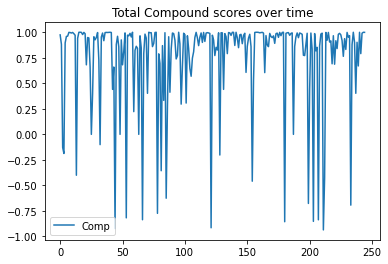

In [31]:
X[['Comp']].plot()
plt.title("Total Compound scores over time")
plt.show()

<AxesSubplot:xlabel='Adj Close', ylabel='Volume'>

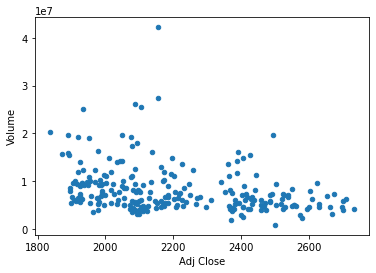

In [18]:
X.plot.scatter('Adj Close','Volume')

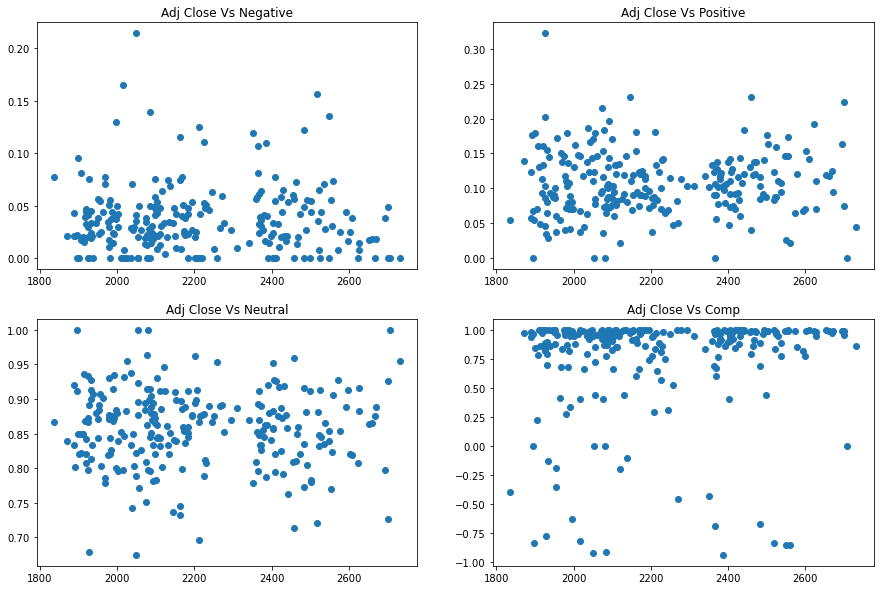

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2,figsize=(15,10))


ax[0, 0].scatter(X['Adj Close'],X['Negative'])
ax[1, 0].scatter(X['Adj Close'],X['Neutral'])
ax[0, 1].scatter(X['Adj Close'],X['Positive'])
ax[1, 1].scatter(X['Adj Close'],X['Comp'])
ax[0, 0].set_title('Adj Close Vs Negative')
ax[1, 0].set_title('Adj Close Vs Neutral')
ax[0, 1].set_title('Adj Close Vs Positive')
ax[1, 1].set_title('Adj Close Vs Comp')

plt.show()

<AxesSubplot:>

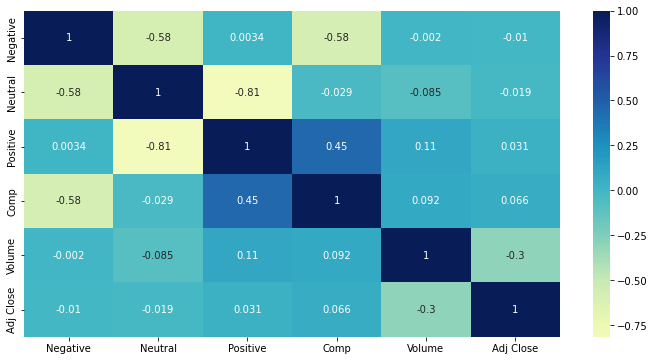

In [21]:
Numerical_Columns=['Negative','Neutral','Positive','Comp','Volume','Adj Close']
plt.figure(figsize=(12, 6))
sns.heatmap(X[Numerical_Columns].corr(), annot = True, center=0, cmap="YlGnBu")

<AxesSubplot:>

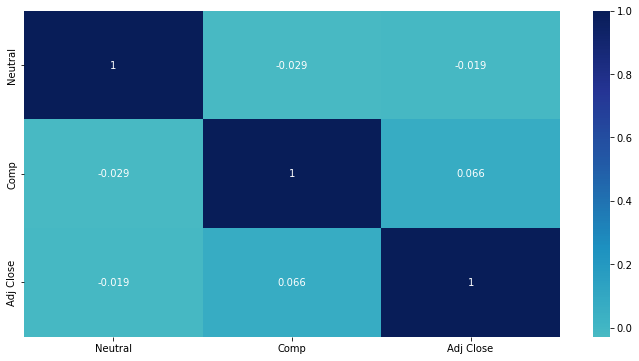

In [22]:
Numerical_Columns=['Neutral','Comp','Adj Close']
plt.figure(figsize=(12, 6))
sns.heatmap(X[Numerical_Columns].corr(), annot = True, center=0, cmap="YlGnBu")

In [32]:
#Split into Train and test data
x_train, x_test = X[0:int(len(df2)*0.8)][['Neutral','Comp']], X[int(len(df2)*0.8)+1:][['Neutral','Comp']]
y_train, y_test = X[0:int(len(df2)*0.8)][['Adj Close']], X[int(len(df2)*0.8)+1:][['Adj Close']]

In [33]:
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((196, 2), (48, 2), (196, 1), (48, 1))

In [34]:
#Scaling the train data for LinearRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Cols=x_train.columns
x_train_scaled=scaler.fit_transform(x_train)
x_train_scaled=pd.DataFrame(x_train_scaled,columns=Cols)
x_train_scaled.head(5)

,Neutral,Comp
0,0.390769,0.986475
1,0.516923,0.938667
2,0.775385,0.413255
3,0.716923,0.382406
4,0.424615,0.945794


In [35]:
x_test_scaled=scaler.fit_transform(x_test)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=Cols)
x_test_scaled.head(5)

,Neutral,Comp
0,0.615385,0.940116
1,0.271255,0.994885
2,0.242915,0.133926
3,0.805668,0.710292
4,0.283401,0.996073


In [36]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error

In [37]:
ModelLR=LR()
ModelLR.fit(x_train_scaled, y_train)
preds_val = ModelLR.predict(x_test_scaled)
np.sqrt(mean_squared_error(y_test, preds_val))

306.4595226090227

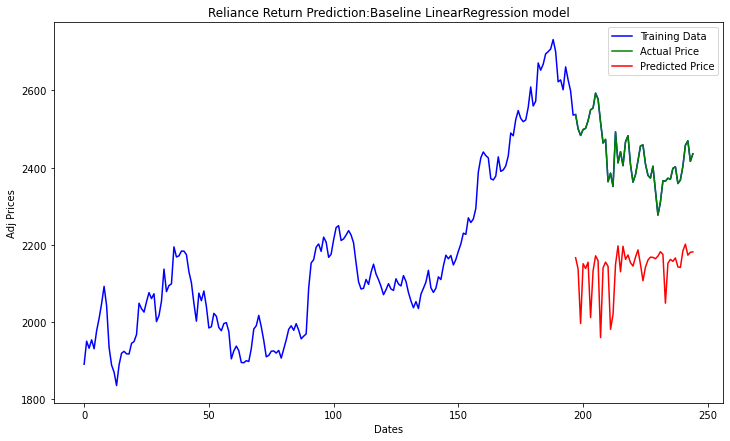

In [38]:
#Plotting the predicted values from baseline LinearRegression model
plt.figure(figsize=(12,7))
plt.plot(X['Adj Close'], 'green', color='blue', label='Training Data')
plt.plot(x_test.index[:],y_test, color='green', label='Actual Price')
plt.plot(x_test.index[:], preds_val, color='red', label='Predicted Price')
plt.title('Reliance Return Prediction:Baseline LinearRegression model')
plt.xlabel('Dates')
plt.ylabel('Adj Prices')
#plt.xticks(np.arange(0,4838,300), X['Date'].dt.year[0:4838:300])
plt.legend()

In [39]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [40]:
#Building a baseline DecisionTreeRegressor model
ModelDTR=DTR()
ModelDTR.fit(x_train, y_train)
preds_val = ModelLR.predict(x_test)
np.sqrt(mean_squared_error(y_test, preds_val))

304.9718362150221

In [41]:
#Searching for best DecisionTreeRegressor model parameters using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [2, 10, 20, 30, 40],
              "max_depth": [4, 6, 8, 10, 12],
              "min_samples_leaf": [8, 16, 32, 64, 128],
              "max_leaf_nodes": [8, 16, 32, 64, 128],
              }
preds_val = RandomizedSearchCV(DTR(),
                         param_grid,
                         scoring='neg_mean_squared_error',
                         n_iter=90)

search = preds_val.fit(x_train, y_train)

search.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 128,
 'max_leaf_nodes': 16,
 'max_depth': 6,
 'criterion': 'mae'}

In [42]:
#Constructing the optimal DecisionTreeRegressor model
optimal_params = {'min_samples_split': 30,
 'min_samples_leaf': 8,
 'max_leaf_nodes': 16,
 'max_depth': 12,
 'criterion': 'mse'}
ModelDTRBest=DTR(**optimal_params)
ModelDTRBest.fit(x_train, y_train)
preds_val = ModelDTRBest.predict(x_test)
np.sqrt(mean_squared_error(y_test, preds_val))

318.5436452351216

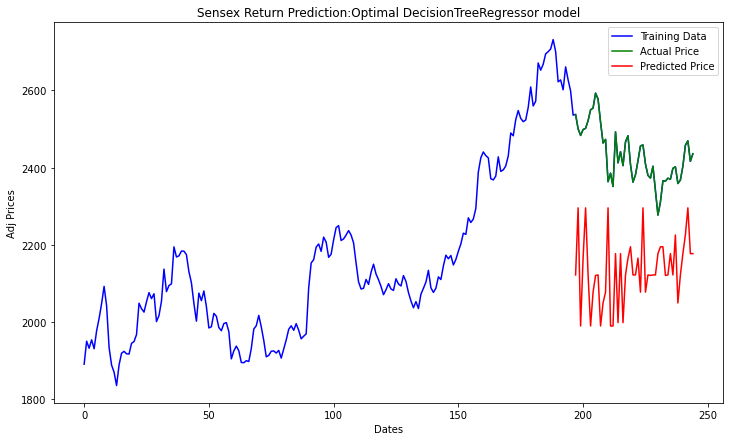

In [43]:
#Plotting the Optimal DecisionTreeRegressor model
plt.figure(figsize=(12,7))
plt.plot(X['Adj Close'], 'green', color='blue', label='Training Data')
plt.plot(x_test.index[:],y_test, color='green', label='Actual Price')
plt.plot(x_test.index[:], preds_val, color='red', label='Predicted Price')
plt.title('Sensex Return Prediction:Optimal DecisionTreeRegressor model')
plt.xlabel('Dates')
plt.ylabel('Adj Prices')
#plt.xticks(np.arange(0,4838,300), X['Date'].dt.year[0:4838:300])
plt.legend()

In [44]:
import numpy as np 
import pandas as pd 
import os
from subprocess import check_output
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import yfinance as yf

<ipython-input-44-5336c04b2d09>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


ModuleNotFoundError: No module named 'yfinance'

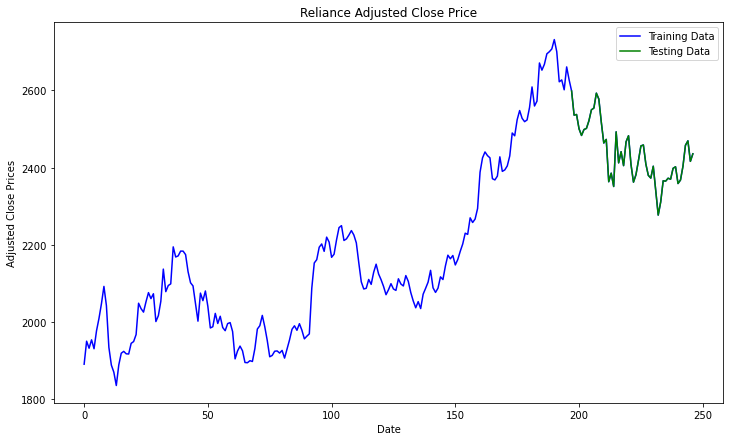

In [44]:
#Splitting into data into test & Training Set
train_data, test_data = rel[0:int(len(rel)*0.8)], rel[int(len(rel)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Reliance Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Prices')
plt.plot(rel['Adj Close'], 'blue', label='Training Data')
plt.plot(test_data['Adj Close'], 'green', label='Testing Data')
#plt.xticks(np.arange(0,4838,300), rel['Date'].dt.year[0:4838:300])
plt.legend()

In [45]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [46]:
adfuller(train_data['Adj Close'])
#p value of 0.93 indicates that we have to accept our null hypothesis of data being non-stationary. 
#In order to predict using ARIMA model, we have to transform our 
#time series data through log differencing which should make resultant series stationary.

(-0.28233742674133194,
 0.927968896742077,
 0,
 196,
 {'1%': -3.464161278384219,
  '5%': -2.876401960790147,
  '10%': -2.5746921001665974},
 1772.5653565143425)

In [47]:
trainS=log(train_data['Adj Close']).diff()
adfuller(trainS[1:])

(-12.337823146208983,
 6.21531111005469e-23,
 0,
 195,
 {'1%': -3.464337030867007,
  '5%': -2.876478799035722,
  '10%': -2.574733103221565},
 -1003.3762945850326)

In [48]:
testS=log(test_data['Adj Close']).diff()
adfuller(testS[1:])

(-5.8935402339533285,
 2.886777626118561e-07,
 2,
 46,
 {'1%': -3.5812576580093696,
  '5%': -2.9267849124681518,
  '10%': -2.6015409829867675},
 -184.78445495214436)

<AxesSubplot:>

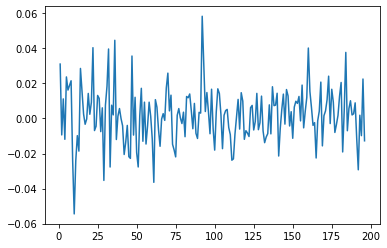

In [49]:
trainS.plot()

In [51]:
!pip install pyramid


ModuleNotFoundError: No module named 'pyramid.arima'

In [46]:
import pyramid
!pip install pyramid-arima

  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima
    Running setup.py install for pyramid-arima: started
    Running setup.py install for pyramid-arima: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'E:\Anaconda\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\pande\\AppData\\Local\\Temp\\pip-install-hby17yd9\\pyramid-arima_7f88f6fa0a9140c5813d71180f2edce4\\setup.py'"'"'; __file__='"'"'C:\\Users\\pande\\AppData\\Local\\Temp\\pip-install-hby17yd9\\pyramid-arima_7f88f6fa0a9140c5813d71180f2edce4\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\pande\AppData\Local\Temp\pip-wheel-yx_4z67b'
       cwd: C:\Users\pande\AppData\Local\Temp\pip-install-hby17yd9\pyramid-arima_7f88f6fa0a9140c5813d71180f2edce4\
  Complete output (168 lines):
  Partial import of pyramid during the build process.
  Requirements: ['Cython>=0.23\nnumpy>=1.10\nscipy>=0.9\nscikit-learn>=0.17\npandas>=0.19\nstatsmodels>=0.9.0\n']
  Adding extra setuptools args
  blas_opt_info

    creating build\lib.win-amd64-3.8\pyramid
    copying pyramid\setup.py -> build\lib.win-amd64-3.8\pyramid
    copying pyramid\_config.py -> build\lib.win-amd64-3.8\pyramid
    copying pyramid\__init__.py -> build\lib.win-amd64-3.8\pyramid
    creating build\lib.win-amd64-3.8\pyramid\__check_build
    copying pyramid\__check_build\setup.py -> build\lib.win-amd64-3.8\pyramid\__check_build
    copying pyramid\__check_build\__init__.py -> build\lib.win-amd64-3.8\pyramid\__check_build
    creating build\lib.win-amd64-3.8\pyramid\__check_build\tests
    copying pyramid\__check_build\tests\test_check_build.py -> build\lib.win-amd64-3.8\pyramid\__check_build/tests
    copying pyramid\__check_build\tests\__init__.py -> build\lib.win-amd64-3.8\pyramid\__check_build/tests
    creating build\lib.win-amd64-3.8\pyramid\_build_utils
    copying pyramid\_build_utils\__init__.py -> build\lib.win-amd64-3.8\pyramid\_build_utils
    creating build\lib.win-amd64-3.8\pyramid\_build_utils\tests
    copyin

In [50]:
!pip install pmdarima

In [68]:
from pmdarima import auto_arima

In [69]:
arima_model = auto_arima(trainS[1:],start_p=1,start_q=1,max_p=5,max_q=5,trace=True,error_action='warn',suppress_warnings=True,stepwise=True,random_state=20,n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1068.779, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1069.682, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1070.797, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1070.776, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1069.440, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1068.844, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1066.816, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1071.049, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1069.052, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1069.007, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1070.914, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1067.051, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.566 seconds


In [70]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  196
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 537.525
Date:                Tue, 11 Jan 2022   AIC                          -1071.049
Time:                        17:21:31   BIC                          -1064.493
Sample:                             0   HQIC                         -1068.395
                                - 196                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1343      0.065      2.056      0.040       0.006       0.262
sigma2         0.0002      2e-05     12.158      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                10.24
Prob(Q):                              0.92   Prob(JB):                         0.01
Heteroskedasticity (H):               0.50   Skew:                             0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
#Making final predictions using ARIMA function
train_ar = trainS[1:].values
test_ar = testS[1:].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(2,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    
    obs = test_ar[t]
    history.append(obs)
print('Testing Mean Squared Error: %.5f' % mean_squared_error(test_ar, predictions))
print('Testing Mean Absolute Error: %.5f' % mean_absolute_error(test_ar, predictions))

<class 'list'>


C:\Users\Vineet Jain\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 0.00037
Testing Mean Absolute Error: 0.01474


In [ ]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  


C:\Users\VINEET~1\AppData\Local\Temp/ipykernel_6628/655365288.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(trainS[1:], 'green', color='blue', label='Training Data')


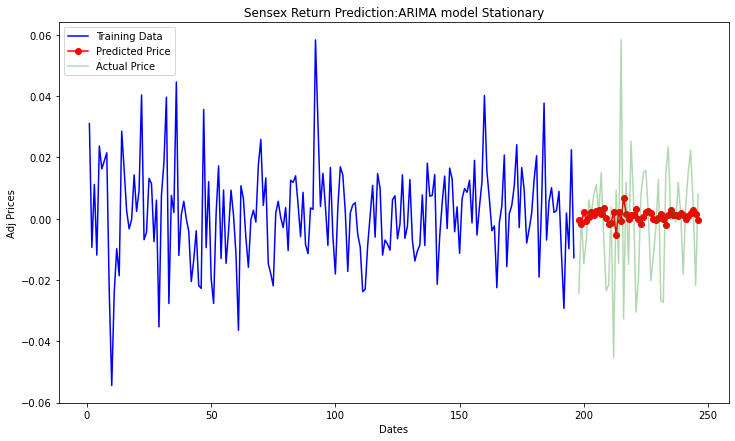

In [73]:
#Plotting the output
plt.figure(figsize=(12,7))
plt.plot(trainS[1:], 'green', color='blue', label='Training Data')
plt.plot(test_data.index[1:],predictions, color='red', marker='o',
         label='Predicted Price')
plt.plot(test_data.index[1:], testS[1:].values, color='green', label='Actual Price',alpha=0.3)
plt.title('Sensex Return Prediction:ARIMA model Stationary')
plt.xlabel('Dates')
plt.ylabel('Adj Prices')
#plt.xticks(np.arange(0,4838,300), Sensex_Data['Date'].dt.year[0:4838:300])
plt.legend()

In [95]:
testS[197]=np.log(test_data['Adj Close'][197])
ArimaModel=pd.DataFrame(np.exp(testS.cumsum()))
ArimaModel.rename(columns={'Adj Close': 'Y_Test'},inplace=True)

In [96]:
PredictedValue=[x.tolist() for x in predictions]
PredictedValue=[val for sublist in PredictedValue for val in sublist]
PredictedValue.insert(0,np.log(test_data['Adj Close'][197]))
ArimaModel['ARIMA_Prediction']=PredictedValue
ArimaModel['ARIMA_Prediction']=pd.DataFrame(np.exp(ArimaModel['ARIMA_Prediction'].cumsum()))
ArimaModel.drop(ArimaModel.head(1).index, inplace=True)

C:\Users\VINEET~1\AppData\Local\Temp/ipykernel_6628/321507730.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(train_data['Adj Close'], 'green', color='blue', label='Training Data')


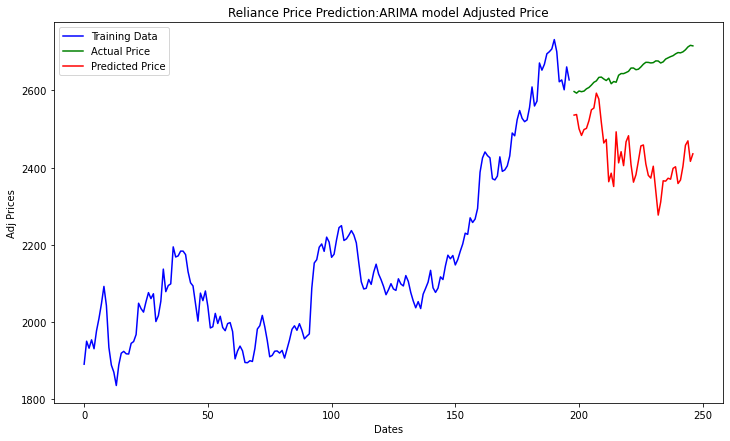

In [97]:
#plotting the final predicted Stock Price to the actual test data
plt.figure(figsize=(12,7))
plt.plot(train_data['Adj Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index[1:],ArimaModel['ARIMA_Prediction'], color='green', label='Actual Price')
plt.plot(test_data.index[1:], ArimaModel['Y_Test'].values, color='red', label='Predicted Price')
plt.title('Reliance Price Prediction:ARIMA model Adjusted Price')
plt.xlabel('Dates')
plt.ylabel('Adj Prices')
#plt.xticks(np.arange(0,4838,300), Sensex_Data['Date'].dt.year[0:4838:300])
plt.legend()

In [98]:
ArimaModel.head(5)

,Y_Test,ARIMA_Prediction
198,2536.250000,2597.310013
199,2537.800049,2593.123357
200,2500.800049,2598.713964
201,2483.600098,2596.887754
202,2498.850098,2598.426368


In [99]:
#ARIMA model mean squared error
print('RMSE: %.2f' % np.sqrt(mean_squared_error(ArimaModel['Y_Test'], ArimaModel['ARIMA_Prediction'])))

RMSE: 239.29


In [100]:
#ARIMA model mean absolute error
print('MAE: %.2f' % mean_absolute_error(ArimaModel['Y_Test'], ArimaModel['ARIMA_Prediction']))

MAE: 219.21


In [101]:
#Exporting the Arima Predictions to csv file which will be used in hybrid model.
ArimaModel['ARIMA_Prediction'].to_csv('ArimaPrediction.csv')

In [127]:
#Importing Stock Market predictions from ARIMA Model
ArimaPrediction=pd.read_csv('ArimaPrediction.csv')
ArimaPrediction.rename(columns={'Unnamed: 0': 'Index'},inplace=True)
ArimaPrediction.set_index('Index',inplace=True)
ArimaPrediction.head()

,ARIMA_Prediction
Index,
198,2597.310013
199,2593.123357
200,2598.713964
201,2596.887754
202,2598.426368


In [173]:
Hybrid_Prediction=pd.DataFrame(y_test)
Hybrid_Prediction.rename(columns={'Adj Close': 'Y_Test'},inplace=True)

In [169]:
y_test.shape,preds_val.shape

((48, 1), (48, 1))

In [162]:
#y_test=y_test.iloc[1:,:]

In [174]:
Hybrid_Prediction['DTPrediction']=preds_val
Hybrid_Prediction=Hybrid_Prediction.join(ArimaPrediction['ARIMA_Prediction'])

In [193]:
#Hybrid_Prediction=Hybrid_Prediction.dropna()
Hybrid_Prediction
Hybrid_Prediction=Hybrid_Prediction.fillna(2617)

In [194]:
def FinalPrediction(ratio,Hybrid_Prediction):
    PredFinal=ratio*Hybrid_Prediction['ARIMA_Prediction']+(1-ratio)*Hybrid_Prediction['DTPrediction']
    return PredFinal

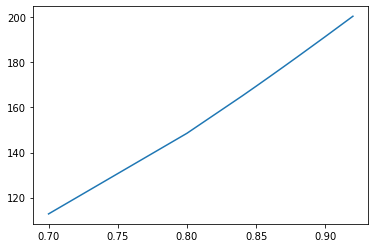

In [206]:
ratio_list=[.70,.80,.84,.85,.86,.87,.88,.90,.92]
list=[]
for ratio in ratio_list:
    PredFinal=FinalPrediction(ratio,Hybrid_Prediction)
    list.append(np.sqrt(mean_squared_error(y_test,PredFinal)))
plt.plot(ratio_list,list)
plt.show()

In [230]:
#Implenting Final Hybrid model
PredFinal=FinalPrediction(.45,Hybrid_Prediction)
print(np.sqrt(mean_squared_error(y_test,PredFinal)))

110.74860410288602


In [231]:
#Final Hybrid model mean absolute error
print(mean_absolute_error(y_test,PredFinal))

80.84777019890409


C:\Users\VINEET~1\AppData\Local\Temp/ipykernel_6628/3535275314.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(y_train, 'green', color='blue', label='Training Data')


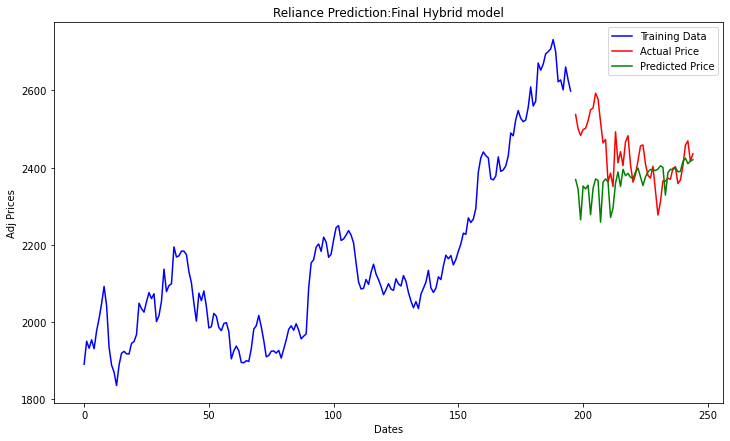

In [232]:
#Plotting the final Hybrid Model
plt.figure(figsize=(12,7))
plt.plot(y_train, 'green', color='blue', label='Training Data')
plt.plot(y_test.index[:],y_test, color='red', label='Actual Price')
plt.plot(y_test.index[:], PredFinal, color='green', label='Predicted Price')
plt.title('Reliance Prediction:Final Hybrid model')
plt.xlabel('Dates')
plt.ylabel('Adj Prices')
#plt.xticks(np.arange(0,4838,300), Sensex_Data['Date'].dt.year[0:4838:300])
plt.legend()

In [21]:
data=X[['Adj Close']]
data
    
    


,Adj Close
0,1891.166260
1,1950.774536
2,1932.583130
3,1954.313110
4,1931.237305
...,...
240,2403.850098
241,2458.100098
242,2469.600098
243,2416.500000


In [22]:
#divide into train and validation set
train = data[:int(0.7*(len(data)))]
valid = data[int(0.7*(len(data))):]

In [52]:
pip install pyramid-arima

  Using cached pyramid-arima-0.8.1.tar.gz (515 kB)
  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima
    Running setup.py install for pyramid-arima: started
    Running setup.py install for pyramid-arima: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'E:\Anaconda\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\pande\\AppData\\Local\\Temp\\pip-install-s28y0m23\\pyramid-arima_aadc0ea5d0364e09a96af61ffd117cbe\\setup.py'"'"'; __file__='"'"'C:\\Users\\pande\\AppData\\Local\\Temp\\pip-install-s28y0m23\\pyramid-arima_aadc0ea5d0364e09a96af61ffd117cbe\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\pande\AppData\Local\Temp\pip-wheel-7pv1fj7l'
       cwd: C:\Users\pande\AppData\Local\Temp\pip-install-s28y0m23\pyramid-arima_aadc0ea5d0364e09a96af61ffd117cbe\
  Complete output (168 lines):
  Partial import of pyramid during the build process.
  Requirements: ['Cython>=0.23\nnumpy>=1.10\nscipy>=0.9\nscikit-learn>=0.17\npandas>=0.19\nstatsmodels>=0.9.0\n']
  Adding extra setuptools args
  blas_opt_info

    Requirements: ['Cython>=0.23\nnumpy>=1.10\nscipy>=0.9\nscikit-learn>=0.17\npandas>=0.19\nstatsmodels>=0.9.0\n']
    Adding extra setuptools args
    blas_opt_info:
    blas_mkl_info:
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries mkl_rt not found in ['E:/Anaconda\\Library\\lib']
      NOT AVAILABLE
    
    blis_info:
      libraries blis not found in ['E:\\Anaconda\\lib', 'C:\\', 'E:\\Anaconda\\libs']
      NOT AVAILABLE
    
    openblas_info:
      libraries openblas not found in ['E:\\Anaconda\\lib', 'C:\\', 'E:\\Anaconda\\libs']
    get_default_fcompiler: matching types: '['gnu', 'intelv', 'absoft', 'compaqv', 'intelev', 'gnu95', 'g95', 'intelvem', 'intelem', 'flang']'
    customize GnuFCompiler
    Could not locate executable g77
    Could not locate executable f77
    customize IntelVisualFCompiler
    Could not locate executable ifort
    Could not locate executable ifl
    customize A

In [53]:
#building the model
from pyramid.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

ModuleNotFoundError: No module named 'pyramid.arima'